# Load File

In [1]:
import json

annotated_file = open("./annotated_data_500/0611_majority.json", 'r', encoding='utf-8')

annotated_file = json.load(annotated_file)

# Collect statistics

In [2]:
# collect statistics
# basic information
sources = dict()
years = dict()
mbfcs = dict()
opinions = dict()
# framing labels
ar = set()
hi = set()
mo = set()
co = set()
ec = set()
# questions required attention
ar4 = list()
ar5 = list()
hi3 = list()
hi4 = list()

for item in annotated_file.keys():
    # by outlets
    temp = annotated_file[item]
    if "_source" in temp.keys():
        if temp["_source"] in sources.keys():
            sources[temp["_source"]].append(item)
        else:
            sources[temp["_source"]] = [item]
    # by year
    if "_year" in temp.keys():
        if "_year" in temp.keys():
            if temp["_year"] in years.keys():
                years[temp["_year"]].append(item)
            else:
                years[temp["_year"]] = [item]
    
    # by mbfc
    if "_mbfc" in temp.keys():
        if "_mbfc" in temp.keys():
            if temp["_mbfc"] in mbfcs.keys():
                mbfcs[temp["_mbfc"]].append(item)
            else:
                mbfcs[temp["_mbfc"]] = [item]
    
    # by opinion
    if "_opinion" in temp.keys():
        if "_opinion" in temp.keys():
            if temp["_opinion"] in opinions.keys():
                opinions[temp["_opinion"]].append(item)
            else:
                opinions[temp["_opinion"]] = [item]
    
    # Attribution of Responsibility
    # question answer may not exist, like hi1, so here we must examine the key
    if 'ar2' in temp.keys():
        if temp['ar2'][0] == 'yes':
            ar.add(item)
    if 'ar6' in temp.keys():
        if temp['ar6'][0] == 'yes':
            ar.add(item)

    # Human Interest
    if 'hi1' in temp.keys():
        if temp['hi1'][0] == 'yes':
            hi.add(item)
    if 'hi2' in temp.keys():
        if temp['hi2'][0] == 'yes':
            hi.add(item)
    if 'hi5' in temp.keys():
        if temp['hi5'][0] == 'yes':
            hi.add(item)

    # Morality
    if 'mo1' in temp.keys():
        if temp['mo1'][0] == 'yes':
            mo.add(item)
    if 'mo2' in temp.keys():
        if temp['mo2'][0] == 'yes':
            mo.add(item)

    # Conflict
    if 'co1' in temp.keys():
        if temp['co1'][0] == 'yes':
            co.add(item)
    if 'co2' in temp.keys():
        if temp['co2'][0] == 'yes':
            co.add(item)
    if 'co3' in temp.keys():
        if temp['co3'][0] == 'yes':
            co.add(item)

    # Economic
    if 'ec1' in temp.keys():
        if temp['ec1'][0] == 'yes':
            ec.add(item)
    if 'ec2' in temp.keys():
        if temp['ec2'][0] == 'yes':
            ec.add(item)
    if 'ec3' in temp.keys():
        if temp['ec3'][0] == 'yes':
            ec.add(item)
    
    # Questions ar4
    if 'ar4' in temp.keys():
        if temp['ar4'][0] == 'yes':
            ar4.append(item)
    
    # Questions ar5
    if 'ar5' in temp.keys():
        if temp['ar5'][0] == 'yes':
            ar5.append(item)
    
    # Questions hi3
    if 'hi3' in temp.keys():
        if temp['hi3'][0] == 'yes':
            hi3.append(item)
    
    # Questions hi4
    if 'hi4' in temp.keys():
        if temp['hi4'][0] == 'yes':
            hi4.append(item)

ar = list(ar)
hi = list(hi)
mo = list(mo)
co = list(co)
ec = list(ec)

# Analysis

In [3]:
# by year
year_analysis = dict()

for key in years.keys():
    if key not in year_analysis.keys():
        year_analysis[key] = {'ar':0, 'hi':0, 'mo':0, 'co':0, 'ec':0, 'ar4':0, 'ar5':0, 'hi3':0, 'hi4':0}
    year = year_analysis[key]
    for passage in years[key]:
        if passage in ar:
            year['ar'] += 1
        
        if passage in hi:
            year['hi'] += 1

        if passage in mo:
            year['mo'] += 1

        if passage in co:
            year['co'] += 1

        if passage in ec:
            year['ec'] += 1

        if passage in ar4:
            year['ar4'] += 1

        if passage in ar5:
            year['ar5'] += 1

        if passage in hi3:
            year['hi3'] += 1

        if passage in hi4:
            year['hi4'] += 1

year_analysis

{'2019': {'ar': 100,
  'hi': 60,
  'mo': 16,
  'co': 123,
  'ec': 80,
  'ar4': 112,
  'ar5': 56,
  'hi3': 77,
  'hi4': 12},
 '2018': {'ar': 72,
  'hi': 48,
  'mo': 7,
  'co': 103,
  'ec': 63,
  'ar4': 77,
  'ar5': 45,
  'hi3': 75,
  'hi4': 16},
 '2017': {'ar': 83,
  'hi': 46,
  'mo': 21,
  'co': 108,
  'ec': 59,
  'ar4': 82,
  'ar5': 34,
  'hi3': 81,
  'hi4': 12}}

In [4]:
# by seasons
import pandas as pd
import re

f = open('./annotated_data_500/pretty_0611_lcad.txt')
content = f.read()
f.close()
examples = content.split("==========================================")[1:]

ids = {}

for item in examples:
    temp = item.split('\n')
    ids[re.findall(r'\d+', temp[1])[0]] = re.findall(r'\d\d\d\d-\d\d-\d\d', temp[2])[0]


def season_statistic(input_list):
    season_data = [0] * 12
    for item in input_list:
        temp = ids[item].split('-')
        season_data[(int(temp[0]) - 2017) * 4 + ((int(temp[1]) - 1) // 3)] += 1

    assert sum(season_data) == len(input_list), "Warning: outlier exists"
    return season_data


In [5]:
# by mbfc
mbfc_analysis = dict()

for key in mbfcs.keys():
    if key not in mbfc_analysis.keys():
        mbfc_analysis[key] = {'ar':0, 'hi':0, 'mo':0, 'co':0, 'ec':0, 'ar4':0, 'ar5':0, 'hi3':0, 'hi4':0}
    mbfc = mbfc_analysis[key]
    for passage in mbfcs[key]:
        if passage in ar:
            mbfc['ar'] += 1
        
        if passage in hi:
            mbfc['hi'] += 1

        if passage in mo:
            mbfc['mo'] += 1

        if passage in co:
            mbfc['co'] += 1

        if passage in ec:
            mbfc['ec'] += 1

        if passage in ar4:
            mbfc['ar4'] += 1

        if passage in ar5:
            mbfc['ar5'] += 1

        if passage in hi3:
            mbfc['hi3'] += 1

        if passage in hi4:
            mbfc['hi4'] += 1

In [6]:
# by outlet
source_analysis = dict()
for key in sources.keys():
    if key not in source_analysis.keys():
        source_analysis[key] = {'ar':0, 'hi':0, 'mo':0, 'co':0, 'ec':0, 'ar4':0, 'ar5':0, 'hi3':0, 'hi4':0}
    source = source_analysis[key]
    for passage in sources[key]:
        if passage in ar:
            source['ar'] += 1
        
        if passage in hi:
            source['hi'] += 1

        if passage in mo:
            source['mo'] += 1

        if passage in co:
            source['co'] += 1

        if passage in ec:
            source['ec'] += 1

        if passage in ar4:
            source['ar4'] += 1

        if passage in ar5:
            source['ar5'] += 1

        if passage in hi3:
            source['hi3'] += 1

        if passage in hi4:
            source['hi4'] += 1

source_analysis

{'breitbart': {'ar': 13,
  'hi': 13,
  'mo': 7,
  'co': 17,
  'ec': 9,
  'ar4': 16,
  'ar5': 7,
  'hi3': 11,
  'hi4': 1},
 'nationalreview': {'ar': 2,
  'hi': 3,
  'mo': 1,
  'co': 4,
  'ec': 2,
  'ar4': 2,
  'ar5': 0,
  'hi3': 2,
  'hi4': 0},
 'rt': {'ar': 4,
  'hi': 6,
  'mo': 0,
  'co': 9,
  'ec': 3,
  'ar4': 7,
  'ar5': 2,
  'hi3': 3,
  'hi4': 1},
 'thehuffingtonpost': {'ar': 17,
  'hi': 10,
  'mo': 0,
  'co': 29,
  'ec': 17,
  'ar4': 25,
  'ar5': 16,
  'hi3': 17,
  'hi4': 1},
 'foxnews': {'ar': 6,
  'hi': 4,
  'mo': 0,
  'co': 11,
  'ec': 10,
  'ar4': 6,
  'ar5': 2,
  'hi3': 5,
  'hi4': 1},
 'Breitbart': {'ar': 7,
  'hi': 7,
  'mo': 3,
  'co': 12,
  'ec': 9,
  'ar4': 11,
  'ar5': 3,
  'hi3': 6,
  'hi4': 1},
 'thenewyorktimes': {'ar': 4,
  'hi': 0,
  'mo': 0,
  'co': 2,
  'ec': 4,
  'ar4': 4,
  'ar5': 0,
  'hi3': 3,
  'hi4': 0},
 'The Guardian': {'ar': 6,
  'hi': 1,
  'mo': 0,
  'co': 8,
  'ec': 2,
  'ar4': 5,
  'ar5': 1,
  'hi3': 4,
  'hi4': 1},
 'Vox': {'ar': 2,
  'hi': 1,
  'mo'

In [7]:
# result save
import os
if not os.path.exists('./output'):
    os.makedirs('./output')

    
with open('./output/year_analysis_output.json', 'w+', encoding='utf-8') as f:
    json.dump(year_analysis, f, indent=4)

with open('./output/mbfc_analysis_output.json', 'w+', encoding='utf-8') as f:
    json.dump(mbfc_analysis, f, indent=4)

with open('./output/source_analysis_output.json', 'w+', encoding='utf-8') as f:
    json.dump(source_analysis, f, indent=4)

In [8]:
# transit for plot
import numpy as np
import matplotlib.pyplot as plt

# some hardcodes here, maybe can be modified for better extension
sorted_year = sorted(year_analysis.keys())
ar_year = list()
hi_year = list()
mo_year = list()
co_year = list()
ec_year = list()
ar4_year = list()
ar5_year = list()
hi3_year = list()
hi4_year = list()

for key in sorted_year:
    ar_year.append(year_analysis[key]['ar'])
    hi_year.append(year_analysis[key]['hi'])
    mo_year.append(year_analysis[key]['mo'])
    co_year.append(year_analysis[key]['co'])
    ec_year.append(year_analysis[key]['ec'])
    ar4_year.append(year_analysis[key]['ar4'])
    ar5_year.append(year_analysis[key]['ar5'])
    hi3_year.append(year_analysis[key]['hi3'])
    hi4_year.append(year_analysis[key]['hi4'])

sorted_mbfc = sorted(mbfc_analysis.keys())
ar_mbfc = list()
hi_mbfc = list()
mo_mbfc = list()
co_mbfc = list()
ec_mbfc = list()
ar4_mbfc = list()
ar5_mbfc = list()
hi3_mbfc = list()
hi4_mbfc = list()

for key in sorted_mbfc:
    ar_mbfc.append(mbfc_analysis[key]['ar'])
    hi_mbfc.append(mbfc_analysis[key]['hi'])
    mo_mbfc.append(mbfc_analysis[key]['mo'])
    co_mbfc.append(mbfc_analysis[key]['co'])
    ec_mbfc.append(mbfc_analysis[key]['ec'])
    ar4_mbfc.append(mbfc_analysis[key]['ar4'])
    ar5_mbfc.append(mbfc_analysis[key]['ar5'])
    hi3_mbfc.append(mbfc_analysis[key]['hi3'])
    hi4_mbfc.append(mbfc_analysis[key]['hi4'])

sorted_source = sorted(source_analysis.keys())
ar_source = list()
hi_source = list()
mo_source = list()
co_source = list()
ec_source = list()
ar4_source = list()
ar5_source = list()
hi3_source = list()
hi4_source = list()

for key in sorted_source:
    ar_source.append(source_analysis[key]['ar'])
    hi_source.append(source_analysis[key]['hi'])
    mo_source.append(source_analysis[key]['mo'])
    co_source.append(source_analysis[key]['co'])
    ec_source.append(source_analysis[key]['ec'])
    ar4_source.append(source_analysis[key]['ar4'])
    ar5_source.append(source_analysis[key]['ar5'])
    hi3_source.append(source_analysis[key]['hi3'])
    hi4_source.append(source_analysis[key]['hi4'])


# Plot

## Basic Plots

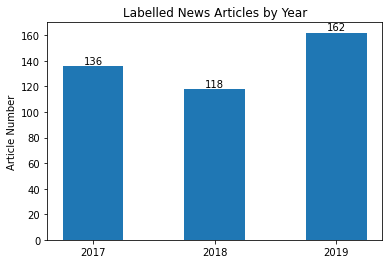

In [13]:
# year
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(years.keys()))
y = [len(years[item]) for item in sorted(years.keys())]


plt.bar(x, y, width = 0.5)


for x0,y0 in zip(x, y):
    plt.text(x0,y0+0.05, str(y0), ha='center',va='bottom')
plt.title('Labelled News Articles by Year')
plt.xticks(x, sorted(years.keys()))
plt.ylabel('Article Number')
plt.savefig('./output/year_distribution.png', dpi=300)
plt.show()

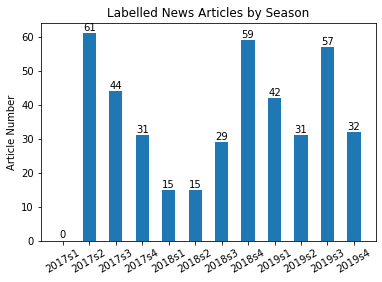

In [14]:
# season

all_passages = []
for item in sorted(years.keys()):
    all_passages.extend(years[item])

y = season_statistic(all_passages)

x = np.arange(len(y))

plt.bar(x, y, width = 0.5)

season_names = ['2017s1', '2017s2', '2017s3', '2017s4', '2018s1', '2018s2', '2018s3', '2018s4', '2019s1', '2019s2', '2019s3', '2019s4']

for x0,y0 in zip(x, y):
    plt.text(x0,y0+0.05, str(y0), ha='center',va='bottom')
plt.title('Labelled News Articles by Season')
plt.xticks(x, season_names, rotation=30)
plt.ylabel('Article Number')
plt.savefig('./output/season_distribution.png', dpi=300)
plt.show()

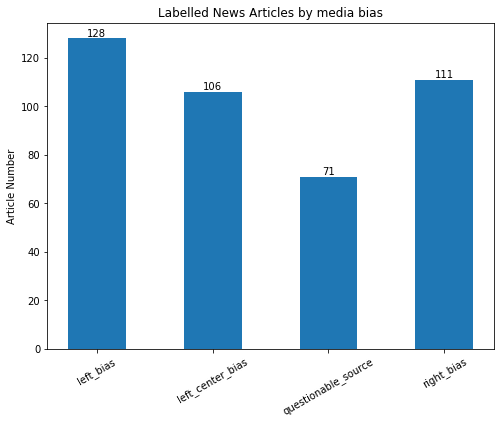

In [28]:
# mbfc
x = np.arange(len(mbfcs.keys()))
y = [len(mbfcs[item]) for item in sorted(mbfcs.keys())]


plt.bar(x, y, width = 0.5)
plt.title('Labelled News Articles by media bias')
for x0,y0 in zip(x, y):
    plt.text(x0,y0+0.05, str(y0), ha='center',va='bottom')
plt.xticks(x, sorted(mbfcs.keys()))
plt.ylabel('Article Number')
plt.savefig('./output/media_bias_distribution.png', dpi=300)
plt.show()

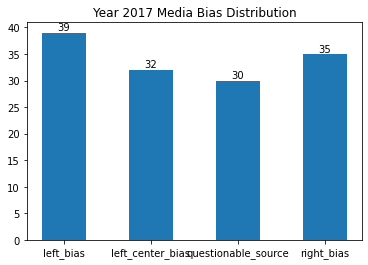

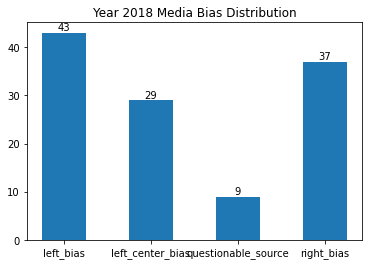

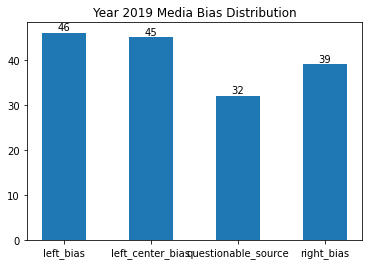

In [12]:
# media bias distribution per year

for year in sorted(years.keys()):
    x = np.arange(len(mbfcs.keys()))
    y = [len(set(years[year]) & set(mbfcs[item])) for item in sorted(mbfcs.keys())]

    plt.bar(x, y, width = 0.5)

    for x0,y0 in zip(x, y):
        plt.text(x0,y0+0.05, str(y0), ha='center',va='bottom')

    plt.title('Year ' + str(year) + ' Media Bias Distribution')
    plt.xticks(x, sorted(mbfcs.keys()))
    plt.show()


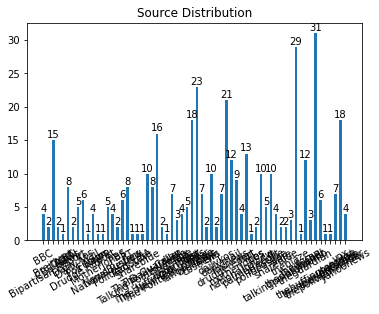

In [13]:
# outlets
x = np.arange(len(sources.keys()))
y = [len(sources[item]) for item in sorted(sources.keys())]


plt.bar(x, y, width = 0.5)
plt.title('Source Distribution')
for x0,y0 in zip(x, y):
    plt.text(x0,y0+0.05, str(y0), ha='center',va='bottom')
plt.rcParams['figure.figsize'] = (80,60) # change here to show all source names
plt.xticks(x, sorted(sources.keys()), rotation=30)
plt.savefig('./output/source_distribution.png', dpi=300)
plt.show()

## year

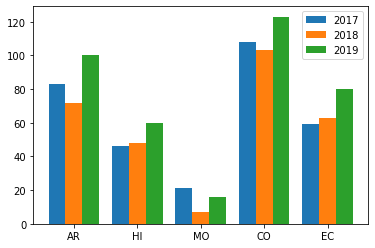

In [16]:
plt.rcParams['figure.figsize'] = (6.0, 4.0) # return to normal
# number
size = 5
x = np.arange(size)
a = np.array([ar_year[0],hi_year[0],mo_year[0],co_year[0],ec_year[0]])
b = np.array([ar_year[1],hi_year[1],mo_year[1],co_year[1],ec_year[1]])
c = np.array([ar_year[2],hi_year[2],mo_year[2],co_year[2],ec_year[2]])
'''a = np.array([ar_year[0],hi_year[0],mo_year[0],co_year[0],ec_year[0],ar4_year[0],ar5_year[0],hi3_year[0],hi4_year[0]])
b = np.array([ar_year[1],hi_year[1],mo_year[1],co_year[1],ec_year[1],ar4_year[1],ar5_year[1],hi3_year[1],hi4_year[1]])
c = np.array([ar_year[2],hi_year[2],mo_year[2],co_year[2],ec_year[2],ar4_year[2],ar5_year[2],hi3_year[2],hi4_year[2]])'''

total_width, n = 0.8, 3
width = total_width / n
x = x - (total_width - width) / 2

plt.bar(x, a,  width=width, label=sorted_year[0])
plt.bar(x + width, b, width=width, label=sorted_year[1])
plt.bar(x + 2 * width, c, width=width, label=sorted_year[2])
plt.legend()
#plt.xticks([i+width for i in x], ['AR','HI','MO','CO','EC','AR4','AR5','HI3','HI4'])
plt.xticks([i+width for i in x], ['AR','HI','MO','CO','EC'])
plt.savefig('./output/year_number.png', dpi=300)
plt.show()

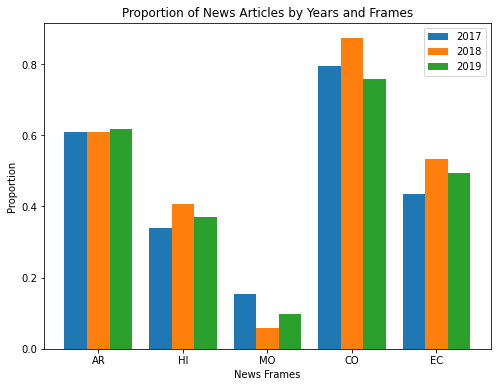

In [11]:
# proportion
size = 5
x = np.arange(size)
'''a = np.array([item/len(years[sorted_year[0]]) for item in [ar_year[0],hi_year[0],mo_year[0],co_year[0],ec_year[0],ar4_year[0],ar5_year[0],hi3_year[0],hi4_year[0]]])
b = np.array([item/len(years[sorted_year[1]]) for item in [ar_year[1],hi_year[1],mo_year[1],co_year[1],ec_year[1],ar4_year[1],ar5_year[1],hi3_year[1],hi4_year[1]]])
c = np.array([item/len(years[sorted_year[2]]) for item in [ar_year[2],hi_year[2],mo_year[2],co_year[2],ec_year[2],ar4_year[2],ar5_year[2],hi3_year[2],hi4_year[2]]])'''
a = np.array([item/len(years[sorted_year[0]]) for item in [ar_year[0],hi_year[0],mo_year[0],co_year[0],ec_year[0]]])
b = np.array([item/len(years[sorted_year[1]]) for item in [ar_year[1],hi_year[1],mo_year[1],co_year[1],ec_year[1]]])
c = np.array([item/len(years[sorted_year[2]]) for item in [ar_year[2],hi_year[2],mo_year[2],co_year[2],ec_year[2]]])

total_width, n = 0.8, 3
width = total_width / n
x = x - (total_width - width) / 2

plt.bar(x, a,  width=width, label=sorted_year[0])
plt.bar(x + width, b, width=width, label=sorted_year[1])
plt.bar(x + 2 * width, c, width=width, label=sorted_year[2])
plt.legend()
#plt.xticks([i+width for i in x], ['AR','HI','MO','CO','EC','AR4','AR5','HI3','HI4'])
plt.xticks([i+width for i in x], ['AR','HI','MO','CO','EC'])
plt.xlabel('News Frames')
plt.ylabel('Proportion')
plt.title('Proportion of News Articles by Years and Frames')
plt.savefig('./output/year_proportion.png', dpi=300)
plt.show()

## season

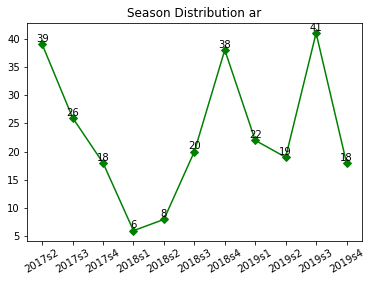

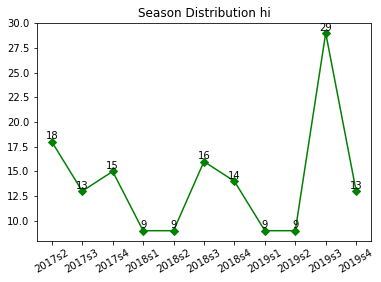

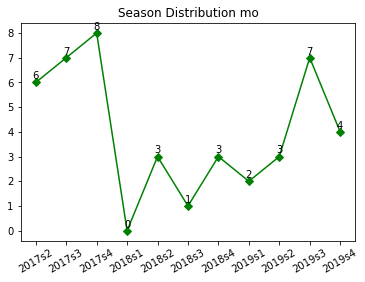

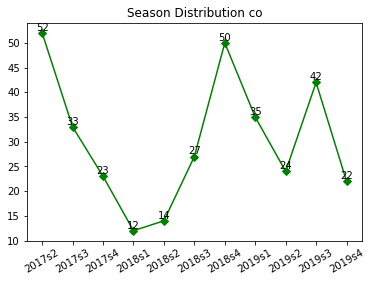

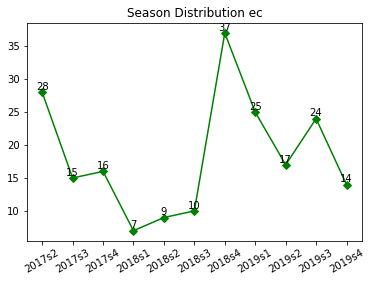

In [16]:
# number

def plotBySeason(input_list, name, ptype):
    y = season_statistic(input_list)[1:]

    if ptype == 'proportion':
        number_by_season = season_statistic(all_passages)[1:]
        for i in range(0, len(y)):
            if number_by_season[i] != 0:
                y[i] = y[i] / number_by_season[i]

    x = np.arange(len(y))

    plt.plot(x, y, "g", marker='D', markersize=5, label=ptype)

    season_names = ['2017s2', '2017s3', '2017s4', '2018s1', '2018s2', '2018s3', '2018s4', '2019s1', '2019s2', '2019s3', '2019s4']

    if ptype == "number":
        for x0,y0 in zip(x, y):
            plt.text(x0,y0+0.05, str(y0), ha='center',va='bottom')
    plt.title('Season Distribution ' + name)
    plt.xticks(x, season_names, rotation=30)
    plt.savefig('./output/season_' + ptype + '_' + name + '.png', dpi=300)
    plt.show()

plotBySeason(ar, 'ar', 'number')
plotBySeason(hi, 'hi', 'number')
plotBySeason(mo, 'mo', 'number')
plotBySeason(co, 'co', 'number')
plotBySeason(ec, 'ec', 'number')

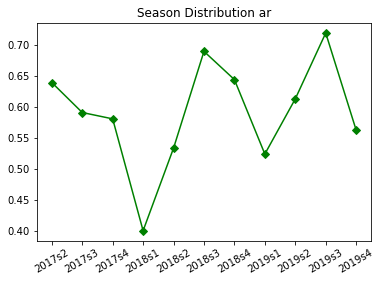

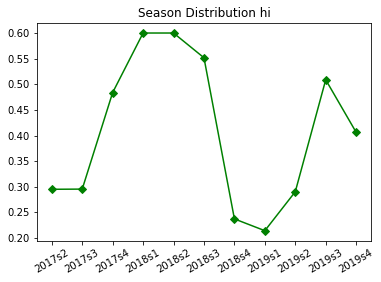

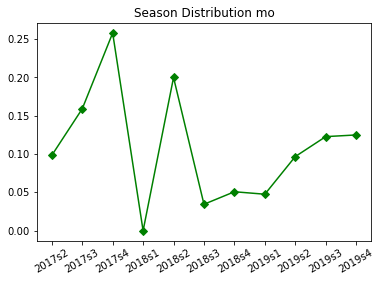

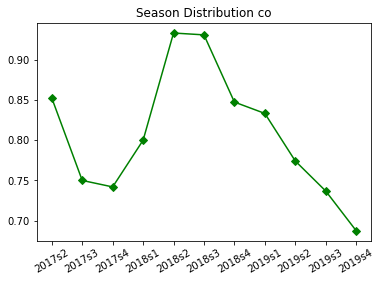

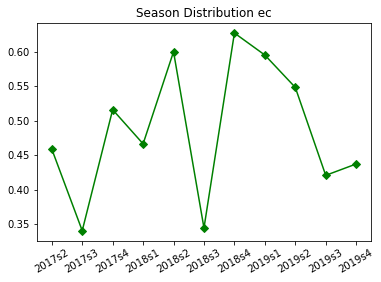

In [17]:
# normalized
plotBySeason(ar, 'ar', 'proportion')
plotBySeason(hi, 'hi', 'proportion')
plotBySeason(mo, 'mo', 'proportion')
plotBySeason(co, 'co', 'proportion')
plotBySeason(ec, 'ec', 'proportion')

## mbfc

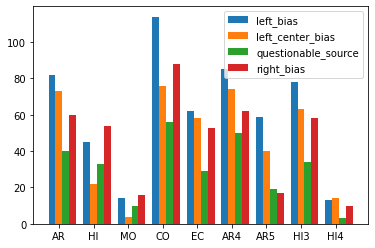

In [18]:
# number
size = 9
x = np.arange(size)

a = np.array([ar_mbfc[0],hi_mbfc[0],mo_mbfc[0],co_mbfc[0],ec_mbfc[0],ar4_mbfc[0],ar5_mbfc[0],hi3_mbfc[0],hi4_mbfc[0]])
b = np.array([ar_mbfc[1],hi_mbfc[1],mo_mbfc[1],co_mbfc[1],ec_mbfc[1],ar4_mbfc[1],ar5_mbfc[1],hi3_mbfc[1],hi4_mbfc[1]])
c = np.array([ar_mbfc[2],hi_mbfc[2],mo_mbfc[2],co_mbfc[2],ec_mbfc[2],ar4_mbfc[2],ar5_mbfc[2],hi3_mbfc[2],hi4_mbfc[2]])
d = np.array([ar_mbfc[3],hi_mbfc[3],mo_mbfc[3],co_mbfc[3],ec_mbfc[3],ar4_mbfc[3],ar5_mbfc[3],hi3_mbfc[3],hi4_mbfc[3]])

total_width, n = 0.8, 4
width = total_width / n
x = x - (total_width - width) / 2

plt.bar(x, a,  width=width, label=sorted_mbfc[0])
plt.bar(x + width, b, width=width, label=sorted_mbfc[1])
plt.bar(x + 2 * width, c, width=width, label=sorted_mbfc[2])
plt.bar(x + 3 * width, d, width=width, label=sorted_mbfc[3])
plt.legend()
plt.xticks([i+width for i in x], ['AR','HI','MO','CO','EC','AR4','AR5','HI3','HI4'])
plt.savefig('./output/mbfc_number.png', dpi=300)
plt.show()


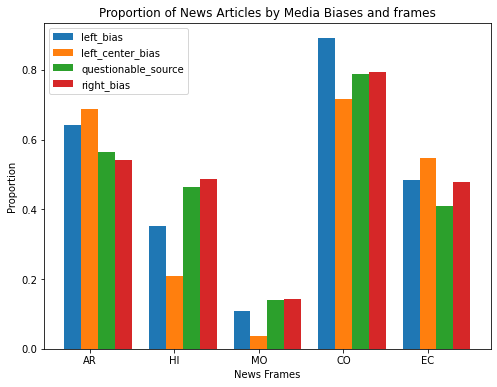

In [9]:
# proportion
plt.rcParams['figure.figsize'] = (8.0, 6.0)
size = 5
x = np.arange(size)

# divide by the number of certain mbfc passages to relieve unbalanced sampling
'''a = np.array([item / len(mbfcs[sorted_mbfc[0]]) for item in [ar_mbfc[0],hi_mbfc[0],mo_mbfc[0],co_mbfc[0],ec_mbfc[0],ar4_mbfc[0],ar5_mbfc[0],hi3_mbfc[0],hi4_mbfc[0]]])
b = np.array([item / len(mbfcs[sorted_mbfc[1]]) for item in [ar_mbfc[1],hi_mbfc[1],mo_mbfc[1],co_mbfc[1],ec_mbfc[1],ar4_mbfc[1],ar5_mbfc[1],hi3_mbfc[1],hi4_mbfc[1]]])
c = np.array([item / len(mbfcs[sorted_mbfc[2]]) for item in [ar_mbfc[2],hi_mbfc[2],mo_mbfc[2],co_mbfc[2],ec_mbfc[2],ar4_mbfc[2],ar5_mbfc[2],hi3_mbfc[2],hi4_mbfc[2]]])
d = np.array([item / len(mbfcs[sorted_mbfc[3]]) for item in [ar_mbfc[3],hi_mbfc[3],mo_mbfc[3],co_mbfc[3],ec_mbfc[3],ar4_mbfc[3],ar5_mbfc[3],hi3_mbfc[3],hi4_mbfc[3]]])'''
a = np.array([item / len(mbfcs[sorted_mbfc[0]]) for item in [ar_mbfc[0],hi_mbfc[0],mo_mbfc[0],co_mbfc[0],ec_mbfc[0]]])
b = np.array([item / len(mbfcs[sorted_mbfc[1]]) for item in [ar_mbfc[1],hi_mbfc[1],mo_mbfc[1],co_mbfc[1],ec_mbfc[1]]])
c = np.array([item / len(mbfcs[sorted_mbfc[2]]) for item in [ar_mbfc[2],hi_mbfc[2],mo_mbfc[2],co_mbfc[2],ec_mbfc[2]]])
d = np.array([item / len(mbfcs[sorted_mbfc[3]]) for item in [ar_mbfc[3],hi_mbfc[3],mo_mbfc[3],co_mbfc[3],ec_mbfc[3]]])

total_width, n = 0.8, 4
width = total_width / n
x = x - (total_width - width) / 2

plt.bar(x, a,  width=width, label=sorted_mbfc[0])
plt.bar(x + width, b, width=width, label=sorted_mbfc[1])
plt.bar(x + 2 * width, c, width=width, label=sorted_mbfc[2])
plt.bar(x + 3 * width, d, width=width, label=sorted_mbfc[3])
plt.legend()
#plt.xticks([i+width for i in x], ['AR','HI','MO','CO','EC','AR4','AR5','HI3','HI4'])
plt.xticks([i+width for i in x], ['AR','HI','MO','CO','EC'])
plt.xlabel('News Frames')
plt.ylabel('Proportion')
plt.title('Proportion of News Articles by Media Biases and Frames')
plt.savefig('./output/mbfc_proportion.png', dpi=300)
plt.show()

## mbfc with year

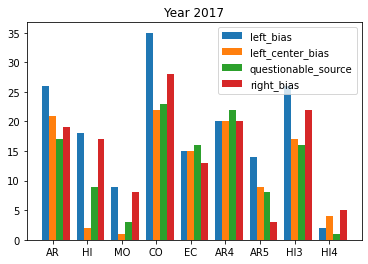

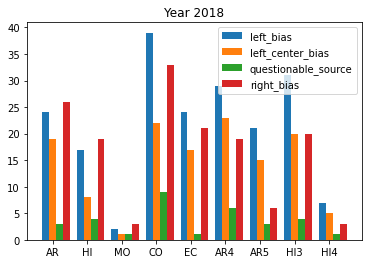

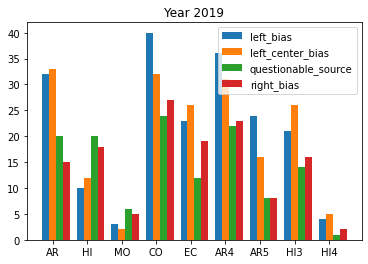

In [20]:
# number
plt.rcParams['figure.figsize'] = (6.0, 4.0)

year_mbfc_analysis = dict()

sorted_mbfc_year = None

for i in range(0, 3):
    size = 9
    x = np.arange(size)
    year = str(2017 + i)

    mbfc_year_analysis = dict()

    for key in mbfcs.keys():
        if key not in mbfc_year_analysis.keys():
            mbfc_year_analysis[key] = {'ar':0, 'hi':0, 'mo':0, 'co':0, 'ec':0, 'ar4':0, 'ar5':0, 'hi3':0, 'hi4':0}
        mbfc = mbfc_year_analysis[key]
        for passage in mbfcs[key]:
            if passage in ar:
                if passage in years[year]:
                    mbfc['ar'] += 1
            
            if passage in hi:
                if passage in years[year]:
                    mbfc['hi'] += 1

            if passage in mo:
                if passage in years[year]:
                    mbfc['mo'] += 1

            if passage in co:
                if passage in years[year]:
                    mbfc['co'] += 1

            if passage in ec:
                if passage in years[year]:
                    mbfc['ec'] += 1

            if passage in ar4:
                if passage in years[year]:
                    mbfc['ar4'] += 1

            if passage in ar5:
                if passage in years[year]:
                    mbfc['ar5'] += 1

            if passage in hi3:
                if passage in years[year]:
                    mbfc['hi3'] += 1

            if passage in hi4:
                if passage in years[year]:
                    mbfc['hi4'] += 1

    year_mbfc_analysis[year] = mbfc_year_analysis
    
    sorted_mbfc_year = sorted(mbfc_year_analysis.keys())

    ar_mbfc_year = list()
    hi_mbfc_year = list()
    mo_mbfc_year = list()
    co_mbfc_year = list()
    ec_mbfc_year = list()
    ar4_mbfc_year = list()
    ar5_mbfc_year = list()
    hi3_mbfc_year = list()
    hi4_mbfc_year = list()

    for key in sorted_mbfc:
        ar_mbfc_year.append(mbfc_year_analysis[key]['ar'])
        hi_mbfc_year.append(mbfc_year_analysis[key]['hi'])
        mo_mbfc_year.append(mbfc_year_analysis[key]['mo'])
        co_mbfc_year.append(mbfc_year_analysis[key]['co'])
        ec_mbfc_year.append(mbfc_year_analysis[key]['ec'])
        ar4_mbfc_year.append(mbfc_year_analysis[key]['ar4'])
        ar5_mbfc_year.append(mbfc_year_analysis[key]['ar5'])
        hi3_mbfc_year.append(mbfc_year_analysis[key]['hi3'])
        hi4_mbfc_year.append(mbfc_year_analysis[key]['hi4'])

    a = np.array([ar_mbfc_year[0],hi_mbfc_year[0],mo_mbfc_year[0],co_mbfc_year[0],ec_mbfc_year[0],ar4_mbfc_year[0],ar5_mbfc_year[0],hi3_mbfc_year[0],hi4_mbfc_year[0]])
    b = np.array([ar_mbfc_year[1],hi_mbfc_year[1],mo_mbfc_year[1],co_mbfc_year[1],ec_mbfc_year[1],ar4_mbfc_year[1],ar5_mbfc_year[1],hi3_mbfc_year[1],hi4_mbfc_year[1]])
    c = np.array([ar_mbfc_year[2],hi_mbfc_year[2],mo_mbfc_year[2],co_mbfc_year[2],ec_mbfc_year[2],ar4_mbfc_year[2],ar5_mbfc_year[2],hi3_mbfc_year[2],hi4_mbfc_year[2]])
    d = np.array([ar_mbfc_year[3],hi_mbfc_year[3],mo_mbfc_year[3],co_mbfc_year[3],ec_mbfc_year[3],ar4_mbfc_year[3],ar5_mbfc_year[3],hi3_mbfc_year[3],hi4_mbfc_year[3]])

    total_width, n = 0.8, 4
    width = total_width / n
    x = x - (total_width - width) / 2

    plt.bar(x, a,  width=width, label=sorted_mbfc_year[0])
    plt.bar(x + width, b, width=width, label=sorted_mbfc_year[1])
    plt.bar(x + 2 * width, c, width=width, label=sorted_mbfc_year[2])
    plt.bar(x + 3 * width, d, width=width, label=sorted_mbfc_year[3])
    plt.legend()
    plt.xticks([i+width for i in x], ['AR','HI','MO','CO','EC','AR4','AR5','HI3','HI4'])
    plt.title('Year ' + year)
    plt.savefig('./output/mbfc_year_' + year + '_number.png', dpi=300)
    plt.show()

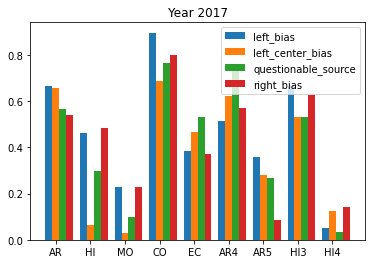

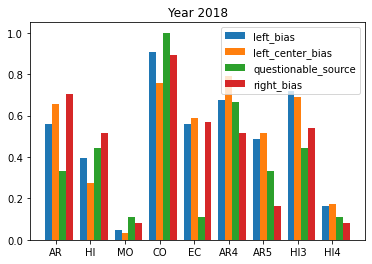

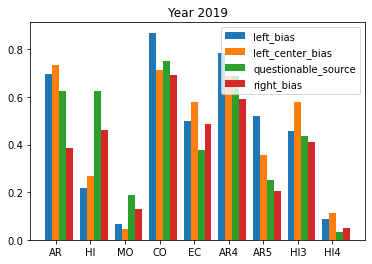

In [22]:
# proportion
for i in range(0, 3):
    size = 9
    x = np.arange(size)
    year = str(2017 + i)

    mbfc_year_analysis = dict()

    for key in mbfcs.keys():
        if key not in mbfc_year_analysis.keys():
            mbfc_year_analysis[key] = {'ar':0, 'hi':0, 'mo':0, 'co':0, 'ec':0, 'ar4':0, 'ar5':0, 'hi3':0, 'hi4':0}
        mbfc = mbfc_year_analysis[key]
        for passage in mbfcs[key]:
            if passage in ar:
                if passage in years[year]:
                    mbfc['ar'] += 1
            
            if passage in hi:
                if passage in years[year]:
                    mbfc['hi'] += 1

            if passage in mo:
                if passage in years[year]:
                    mbfc['mo'] += 1

            if passage in co:
                if passage in years[year]:
                    mbfc['co'] += 1

            if passage in ec:
                if passage in years[year]:
                    mbfc['ec'] += 1

            if passage in ar4:
                if passage in years[year]:
                    mbfc['ar4'] += 1

            if passage in ar5:
                if passage in years[year]:
                    mbfc['ar5'] += 1

            if passage in hi3:
                if passage in years[year]:
                    mbfc['hi3'] += 1

            if passage in hi4:
                if passage in years[year]:
                    mbfc['hi4'] += 1

    year_mbfc_analysis[year] = mbfc_year_analysis
    
    sorted_mbfc_year = sorted(mbfc_year_analysis.keys())

    ar_mbfc_year = list()
    hi_mbfc_year = list()
    mo_mbfc_year = list()
    co_mbfc_year = list()
    ec_mbfc_year = list()
    ar4_mbfc_year = list()
    ar5_mbfc_year = list()
    hi3_mbfc_year = list()
    hi4_mbfc_year = list()

    for key in sorted_mbfc:
        ar_mbfc_year.append(mbfc_year_analysis[key]['ar'])
        hi_mbfc_year.append(mbfc_year_analysis[key]['hi'])
        mo_mbfc_year.append(mbfc_year_analysis[key]['mo'])
        co_mbfc_year.append(mbfc_year_analysis[key]['co'])
        ec_mbfc_year.append(mbfc_year_analysis[key]['ec'])
        ar4_mbfc_year.append(mbfc_year_analysis[key]['ar4'])
        ar5_mbfc_year.append(mbfc_year_analysis[key]['ar5'])
        hi3_mbfc_year.append(mbfc_year_analysis[key]['hi3'])
        hi4_mbfc_year.append(mbfc_year_analysis[key]['hi4'])


    # divide by the number of certain mbfc passages to relieve unbalanced sampling
    a = np.array([item / len(set(mbfcs[sorted_mbfc_year[0]]) & set(years[year])) for item in [ar_mbfc_year[0],hi_mbfc_year[0],mo_mbfc_year[0],co_mbfc_year[0],ec_mbfc_year[0],ar4_mbfc_year[0],ar5_mbfc_year[0],hi3_mbfc_year[0],hi4_mbfc_year[0]]])
    b = np.array([item / len(set(mbfcs[sorted_mbfc_year[1]]) & set(years[year])) for item in [ar_mbfc_year[1],hi_mbfc_year[1],mo_mbfc_year[1],co_mbfc_year[1],ec_mbfc_year[1],ar4_mbfc_year[1],ar5_mbfc_year[1],hi3_mbfc_year[1],hi4_mbfc_year[1]]])
    c = np.array([item / len(set(mbfcs[sorted_mbfc_year[2]]) & set(years[year])) for item in [ar_mbfc_year[2],hi_mbfc_year[2],mo_mbfc_year[2],co_mbfc_year[2],ec_mbfc_year[2],ar4_mbfc_year[2],ar5_mbfc_year[2],hi3_mbfc_year[2],hi4_mbfc_year[2]]])
    d = np.array([item / len(set(mbfcs[sorted_mbfc_year[3]]) & set(years[year])) for item in [ar_mbfc_year[3],hi_mbfc_year[3],mo_mbfc_year[3],co_mbfc_year[3],ec_mbfc_year[3],ar4_mbfc_year[3],ar5_mbfc_year[3],hi3_mbfc_year[3],hi4_mbfc_year[3]]])

    total_width, n = 0.8, 4
    width = total_width / n
    x = x - (total_width - width) / 2

    plt.bar(x, a,  width=width, label=sorted_mbfc_year[0])
    plt.bar(x + width, b, width=width, label=sorted_mbfc_year[1])
    plt.bar(x + 2 * width, c, width=width, label=sorted_mbfc_year[2])
    plt.bar(x + 3 * width, d, width=width, label=sorted_mbfc_year[3])
    plt.legend()
    plt.xticks([i+width for i in x], ['AR','HI','MO','CO','EC','AR4','AR5','HI3','HI4'])
    plt.title('Year ' + year)
    plt.savefig('./output/mbfc_year_' + year + '_proportion.png', dpi=300)
    plt.show()

## year with mbfc

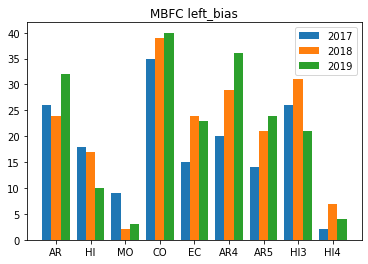

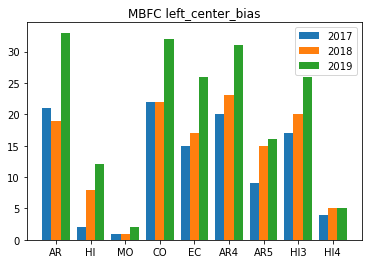

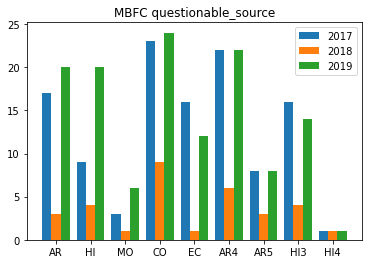

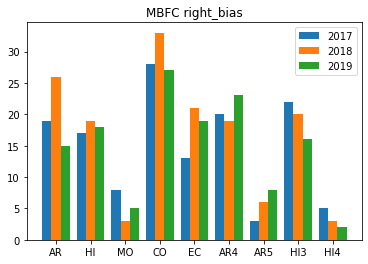

In [23]:
# number
for key in sorted_mbfc:
    size = 9
    x = np.arange(size)

    a = np.array([year_mbfc_analysis['2017'][key]['ar'],year_mbfc_analysis['2017'][key]['hi'],year_mbfc_analysis['2017'][key]['mo'],year_mbfc_analysis['2017'][key]['co'],
                  year_mbfc_analysis['2017'][key]['ec'],year_mbfc_analysis['2017'][key]['ar4'],year_mbfc_analysis['2017'][key]['ar5'],year_mbfc_analysis['2017'][key]['hi3'],year_mbfc_analysis['2017'][key]['hi4']])
    b = np.array([year_mbfc_analysis['2018'][key]['ar'],year_mbfc_analysis['2018'][key]['hi'],year_mbfc_analysis['2018'][key]['mo'],year_mbfc_analysis['2018'][key]['co'],
                  year_mbfc_analysis['2018'][key]['ec'],year_mbfc_analysis['2018'][key]['ar4'],year_mbfc_analysis['2018'][key]['ar5'],year_mbfc_analysis['2018'][key]['hi3'],year_mbfc_analysis['2018'][key]['hi4']])
    c = np.array([year_mbfc_analysis['2019'][key]['ar'],year_mbfc_analysis['2019'][key]['hi'],year_mbfc_analysis['2019'][key]['mo'],year_mbfc_analysis['2019'][key]['co'],
                  year_mbfc_analysis['2019'][key]['ec'],year_mbfc_analysis['2019'][key]['ar4'],year_mbfc_analysis['2019'][key]['ar5'],year_mbfc_analysis['2019'][key]['hi3'],year_mbfc_analysis['2019'][key]['hi4']])

    total_width, n = 0.8, 3
    width = total_width / n
    x = x - (total_width - width) / 2

    plt.bar(x, a,  width=width, label='2017')
    plt.bar(x + width, b, width=width, label='2018')
    plt.bar(x + 2 * width, c, width=width, label='2019')
    plt.legend()
    plt.xticks([i+width for i in x], ['AR','HI','MO','CO','EC','AR4','AR5','HI3','HI4'])
    plt.title('MBFC ' + key)
    plt.savefig('./output/year_mbfc_' + key + '_number.png', dpi=300)
    plt.show()

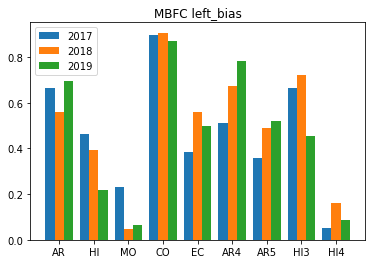

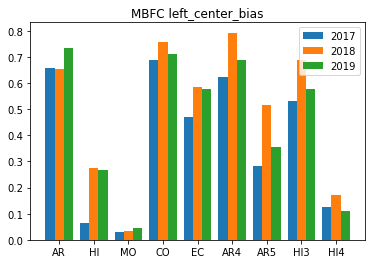

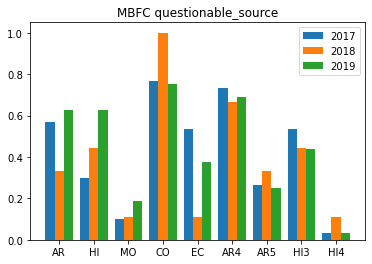

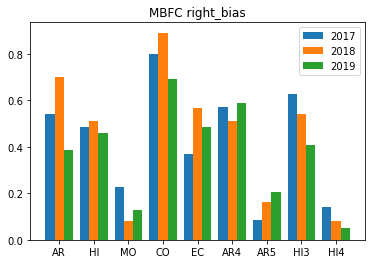

In [24]:
# proportion
for key in sorted_mbfc:
    size = 9
    x = np.arange(size)

    # divide by passages of the year
    a = np.array([item / len(set(years['2017']) & set(mbfcs[key])) for item in [year_mbfc_analysis['2017'][key]['ar'],year_mbfc_analysis['2017'][key]['hi'],year_mbfc_analysis['2017'][key]['mo'],year_mbfc_analysis['2017'][key]['co'],
                  year_mbfc_analysis['2017'][key]['ec'],year_mbfc_analysis['2017'][key]['ar4'],year_mbfc_analysis['2017'][key]['ar5'],year_mbfc_analysis['2017'][key]['hi3'],year_mbfc_analysis['2017'][key]['hi4']]])
    b = np.array([item / len(set(years['2018']) & set(mbfcs[key])) for item in [year_mbfc_analysis['2018'][key]['ar'],year_mbfc_analysis['2018'][key]['hi'],year_mbfc_analysis['2018'][key]['mo'],year_mbfc_analysis['2018'][key]['co'],
                  year_mbfc_analysis['2018'][key]['ec'],year_mbfc_analysis['2018'][key]['ar4'],year_mbfc_analysis['2018'][key]['ar5'],year_mbfc_analysis['2018'][key]['hi3'],year_mbfc_analysis['2018'][key]['hi4']]])
    c = np.array([item / len(set(years['2019']) & set(mbfcs[key])) for item in [year_mbfc_analysis['2019'][key]['ar'],year_mbfc_analysis['2019'][key]['hi'],year_mbfc_analysis['2019'][key]['mo'],year_mbfc_analysis['2019'][key]['co'],
                  year_mbfc_analysis['2019'][key]['ec'],year_mbfc_analysis['2019'][key]['ar4'],year_mbfc_analysis['2019'][key]['ar5'],year_mbfc_analysis['2019'][key]['hi3'],year_mbfc_analysis['2019'][key]['hi4']]])

    total_width, n = 0.8, 3
    width = total_width / n
    x = x - (total_width - width) / 2

    plt.bar(x, a,  width=width, label='2017')
    plt.bar(x + width, b, width=width, label='2018')
    plt.bar(x + 2 * width, c, width=width, label='2019')
    plt.legend()
    plt.xticks([i+width for i in x], ['AR','HI','MO','CO','EC','AR4','AR5','HI3','HI4'])
    plt.title('MBFC ' + key)
    plt.savefig('./output/year_mbfc_' + key + '_proportion.png', dpi=300)
    plt.show()

## source

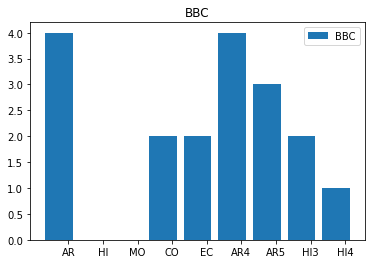

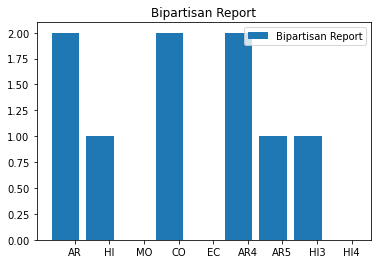

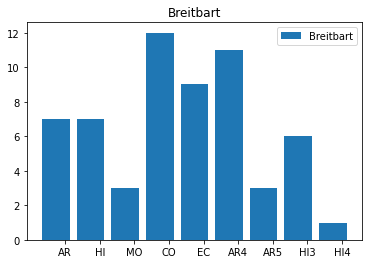

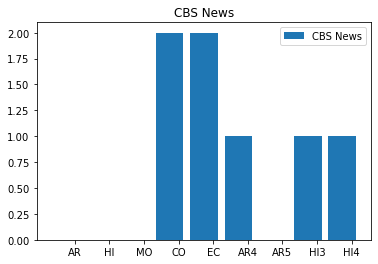

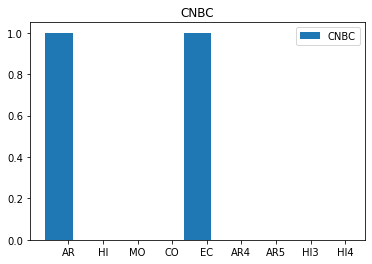

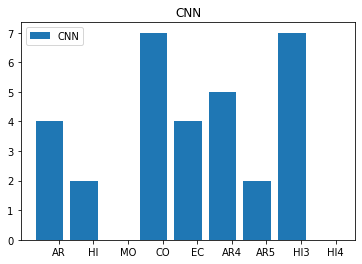

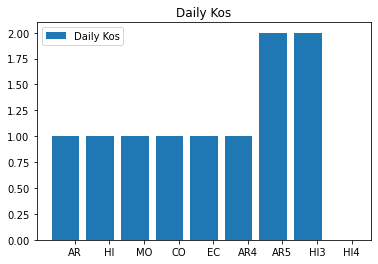

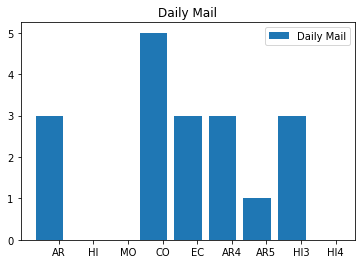

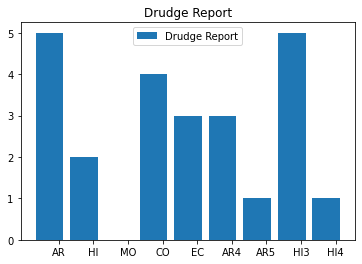

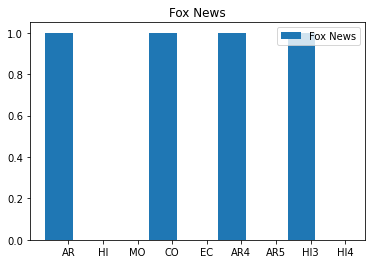

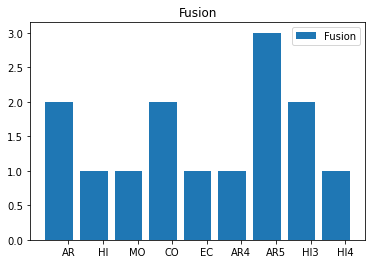

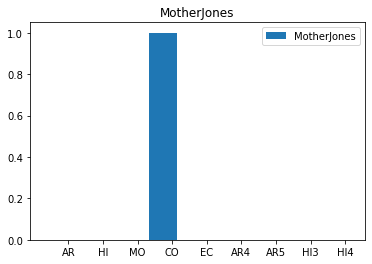

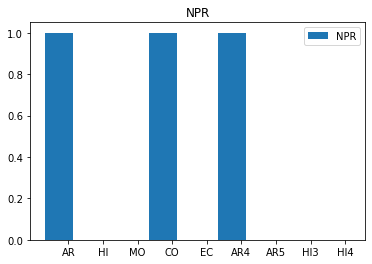

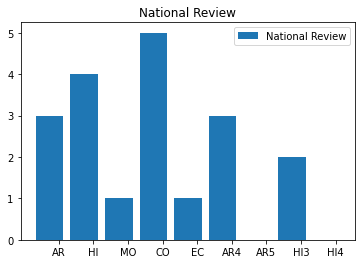

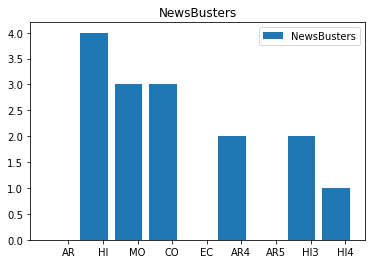

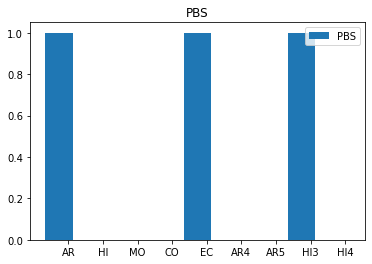

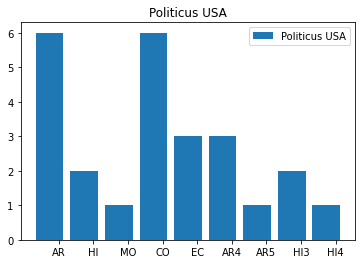

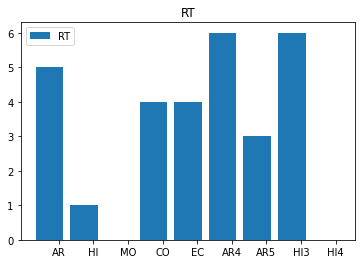

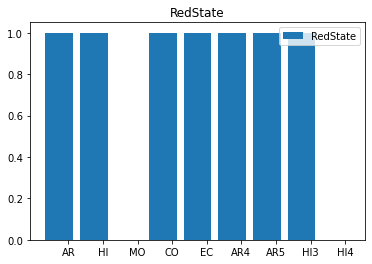

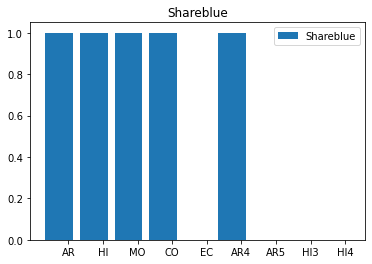

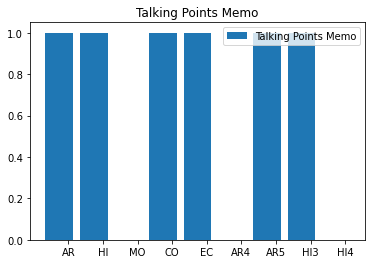

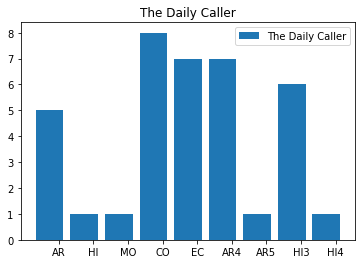

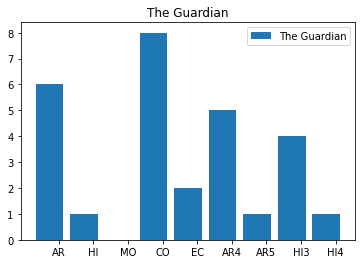

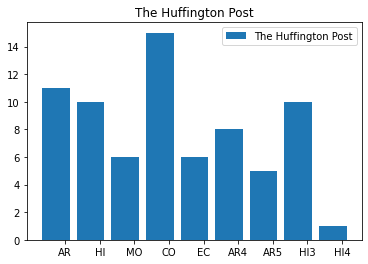

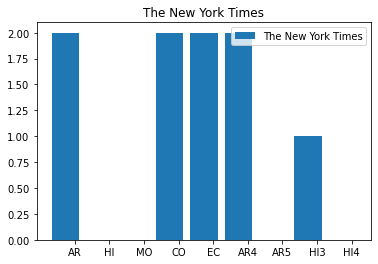

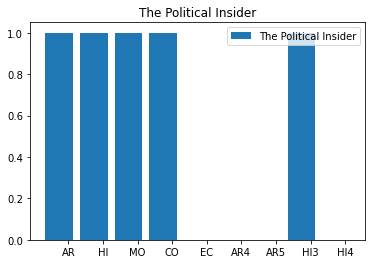

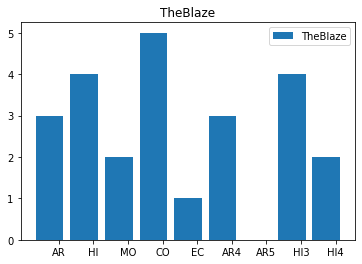

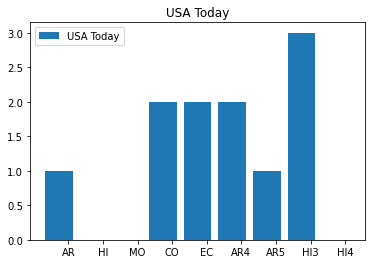

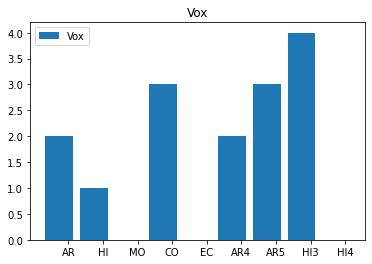

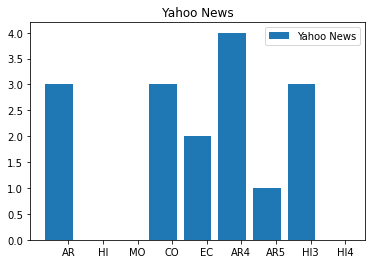

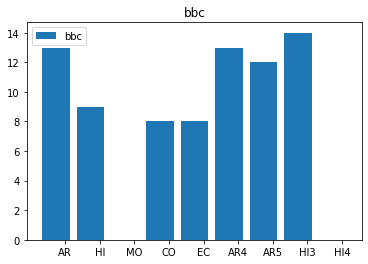

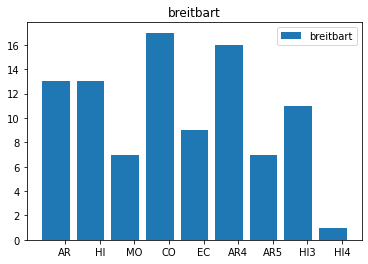

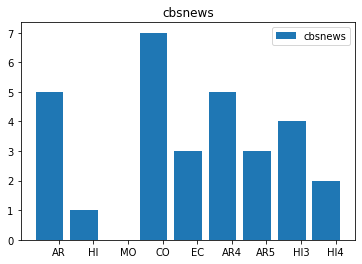

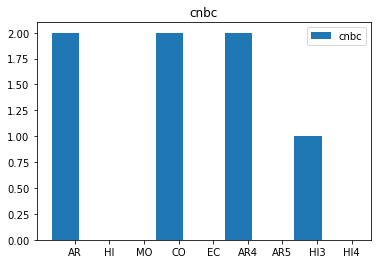

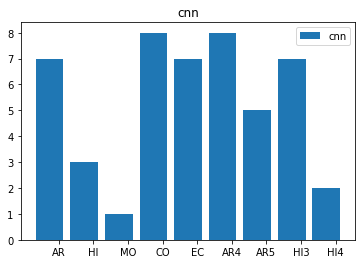

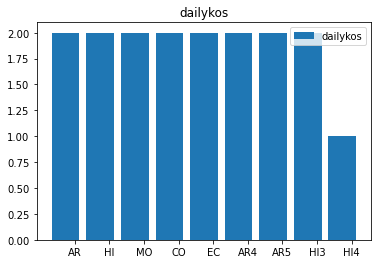

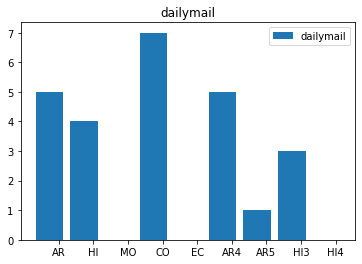

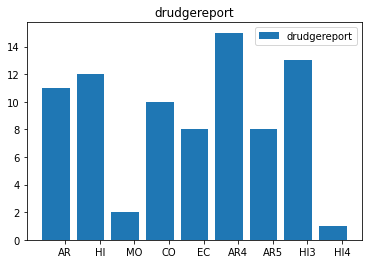

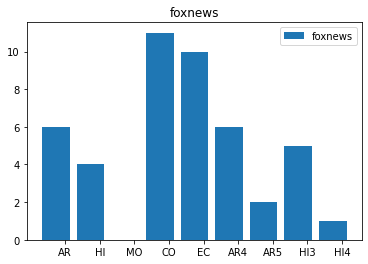

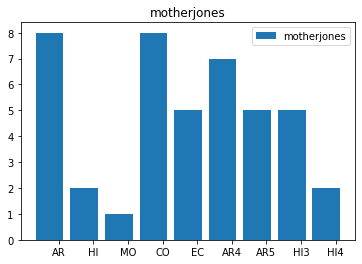

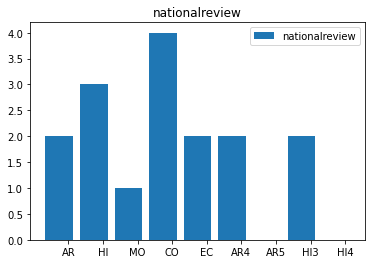

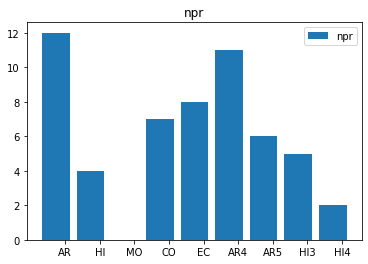

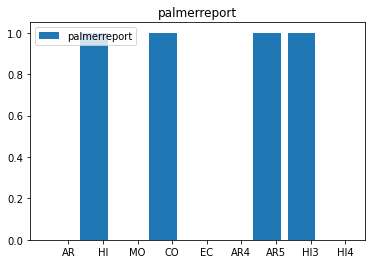

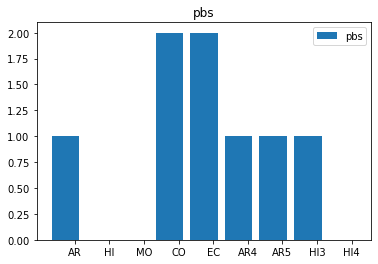

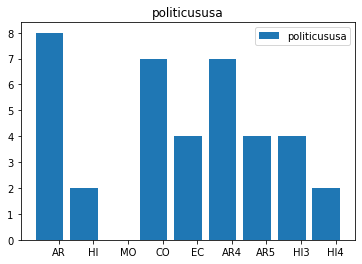

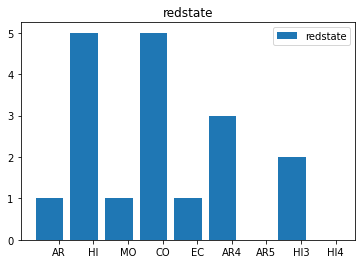

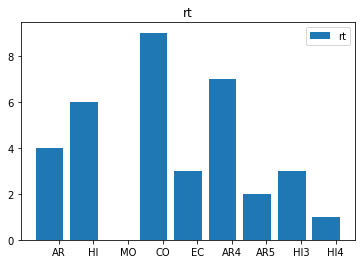

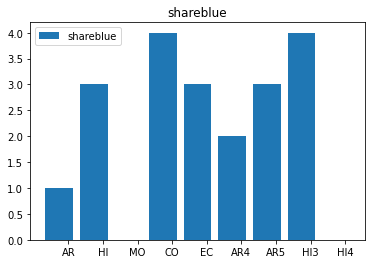

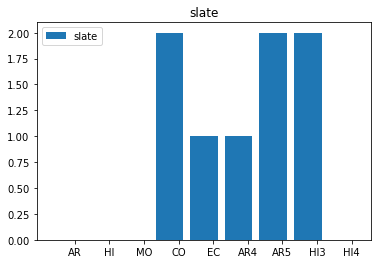

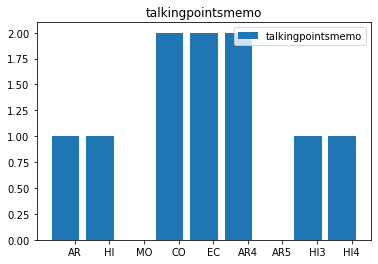

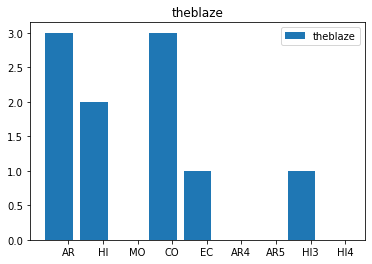

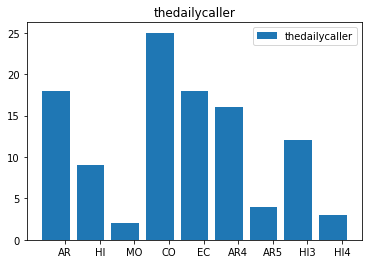

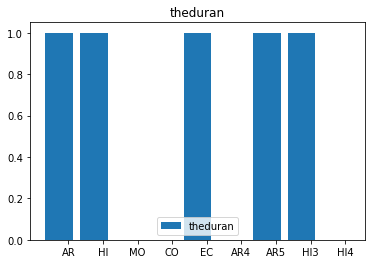

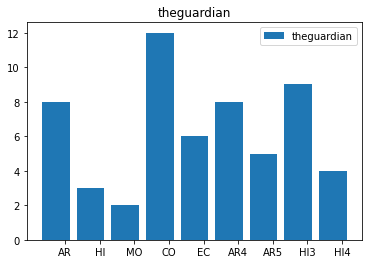

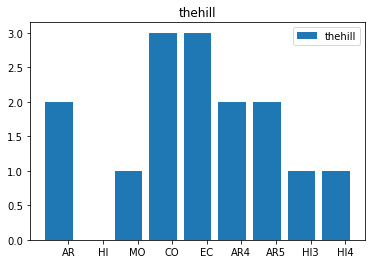

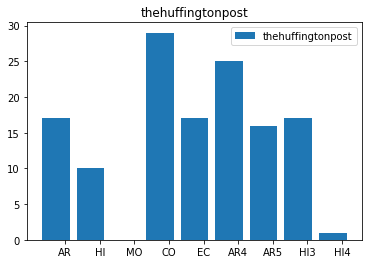

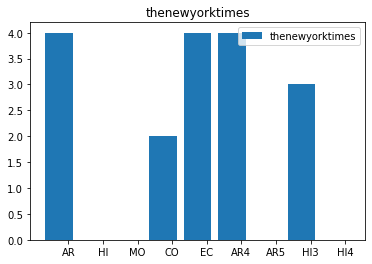

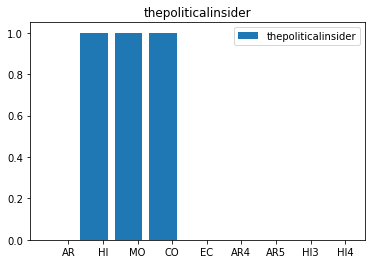

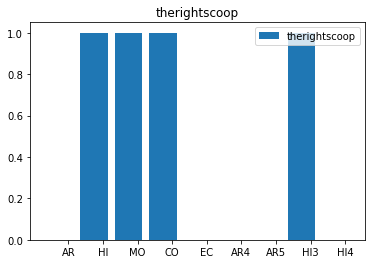

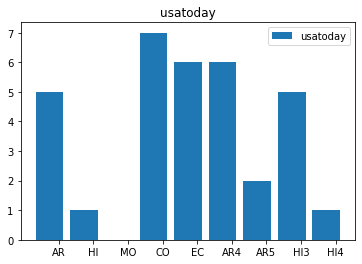

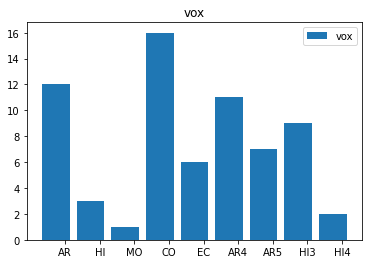

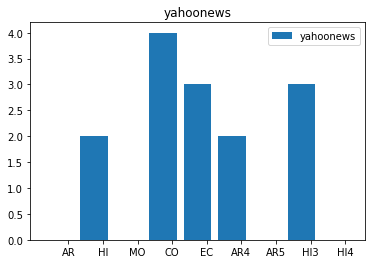

In [26]:
# absolute number
def plot_by_source_number(i):
    size = 9
    x = np.arange(size)

    item = np.array([ar_source[i],hi_source[i],mo_source[i],co_source[i],ec_source[i],ar4_source[i],ar5_source[i],hi3_source[i],hi4_source[i]])
    plt.bar(x, item, label=sorted_source[i])

    plt.legend()
    plt.xticks([i+width for i in x], ['AR','HI','MO','CO','EC','AR4','AR5','HI3','HI4'])
    plt.title(sorted_source[i])
    plt.savefig('./output/source_number_' + sorted_source[i] + '.png', dpi=300)
    plt.show()

for i in range(0, len(source_analysis.keys())):
    plot_by_source_number(i)

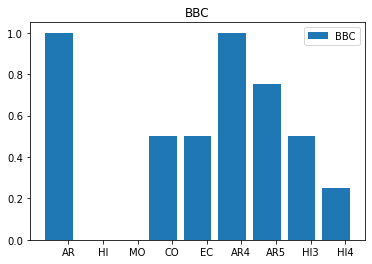

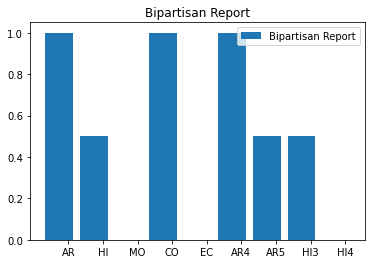

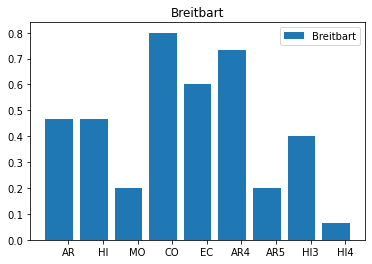

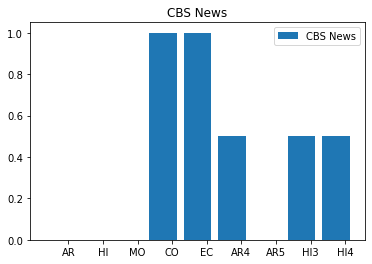

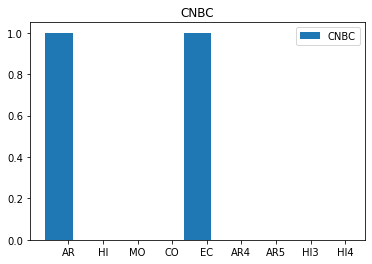

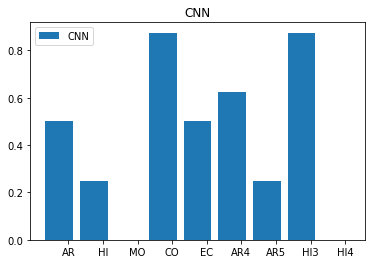

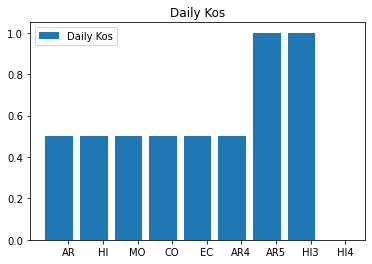

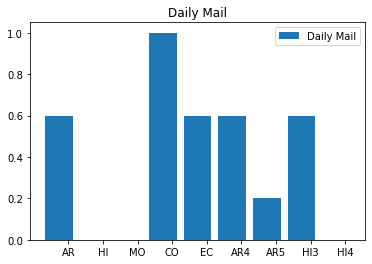

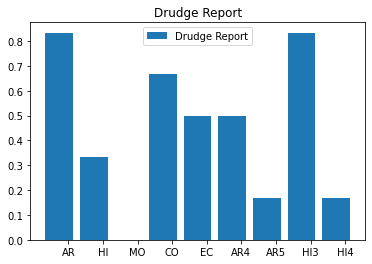

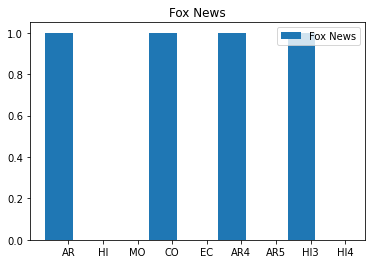

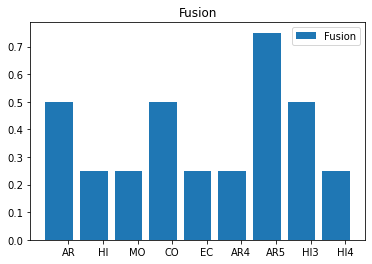

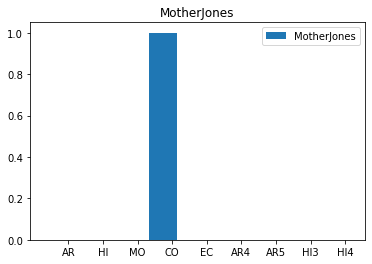

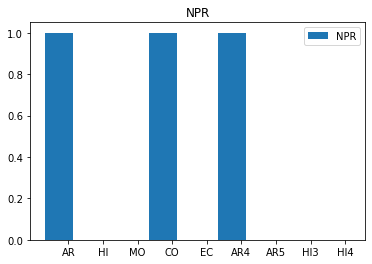

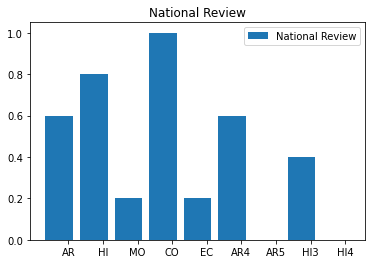

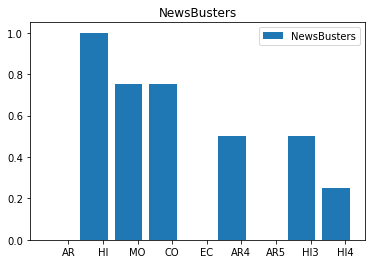

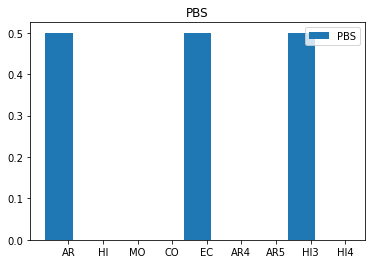

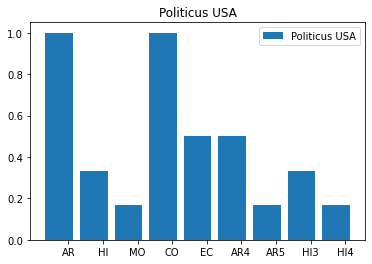

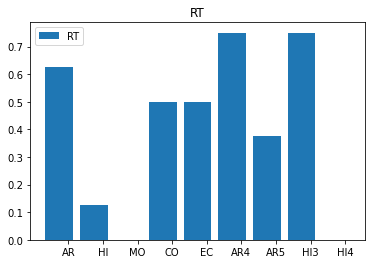

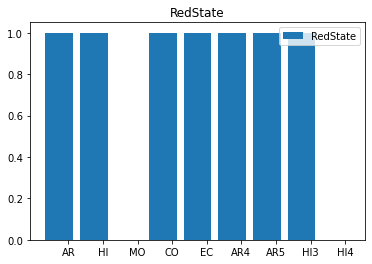

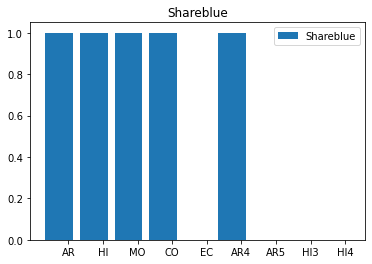

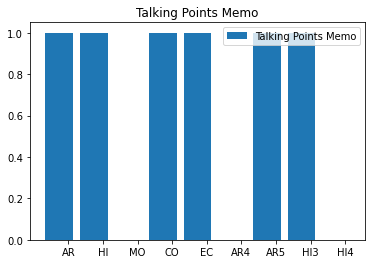

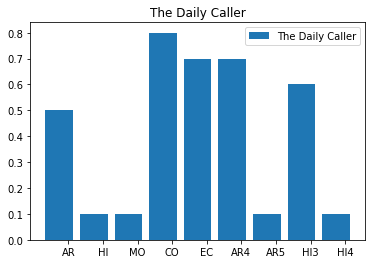

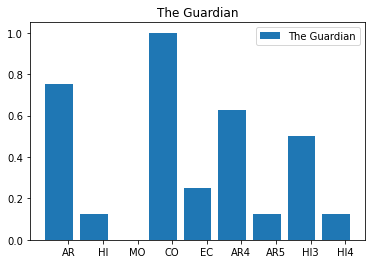

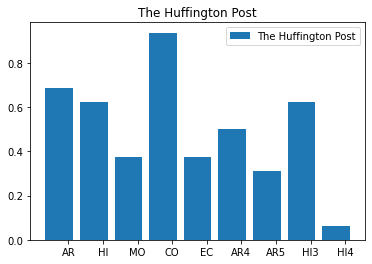

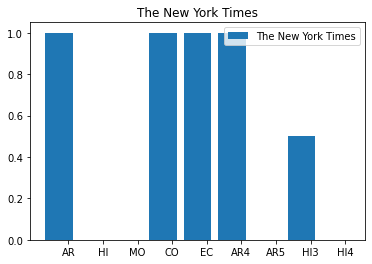

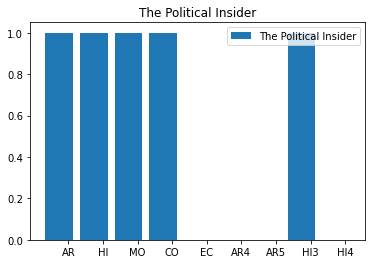

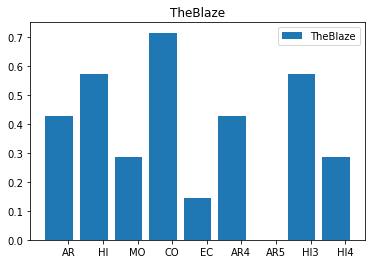

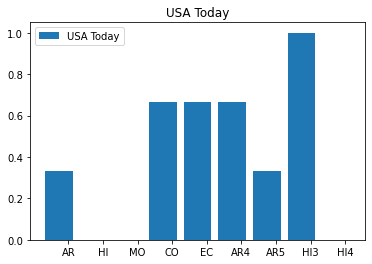

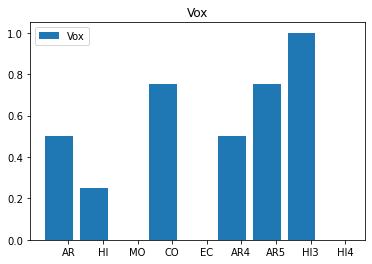

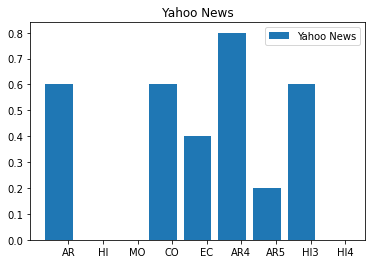

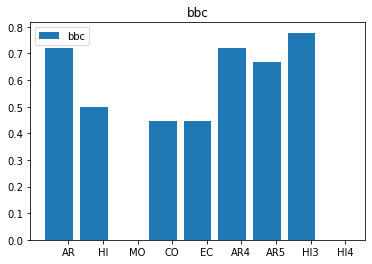

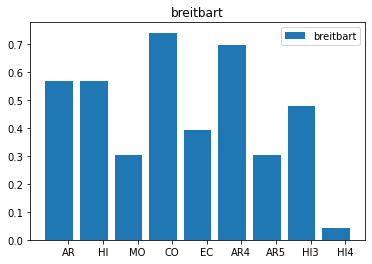

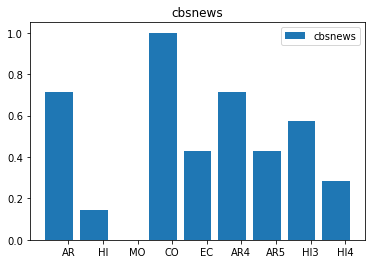

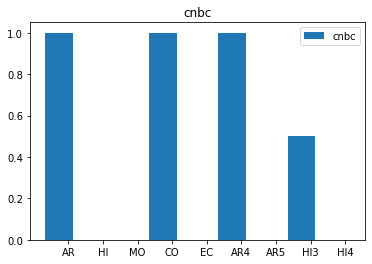

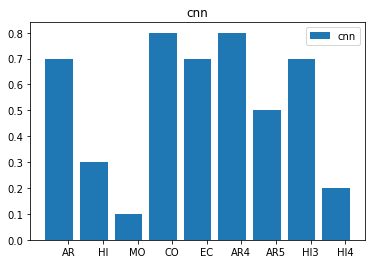

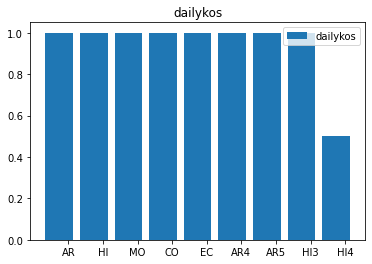

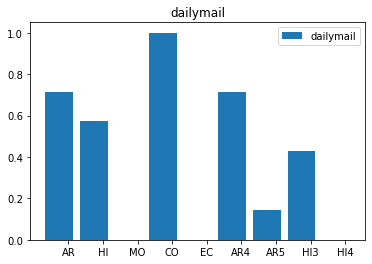

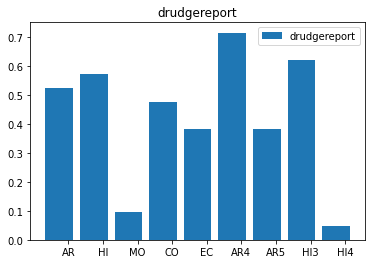

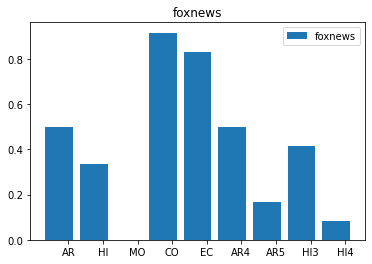

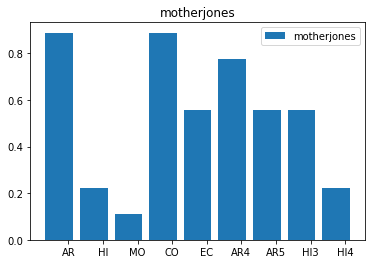

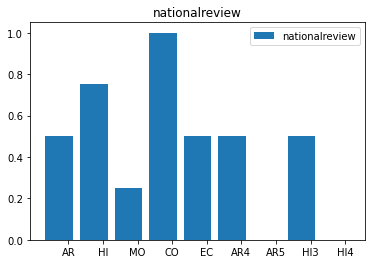

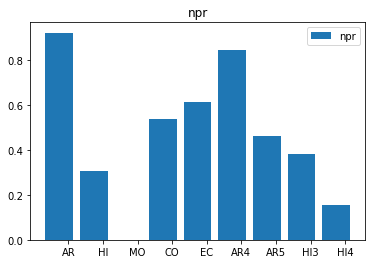

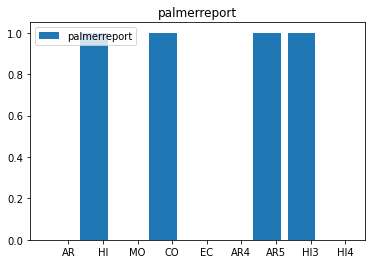

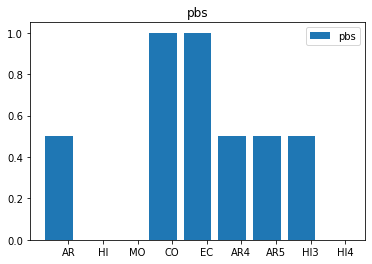

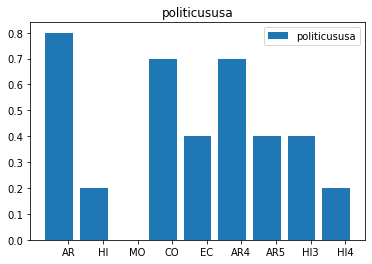

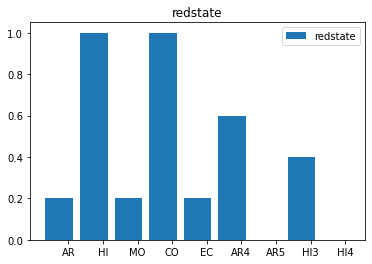

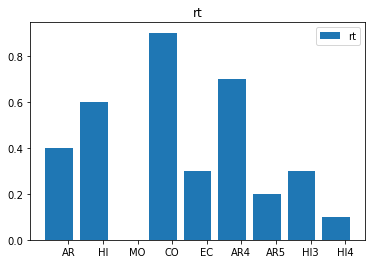

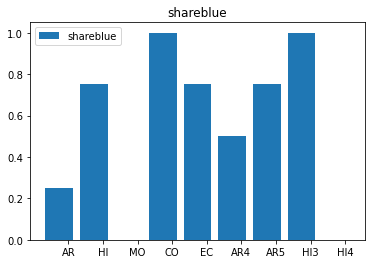

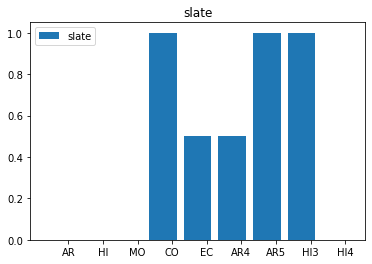

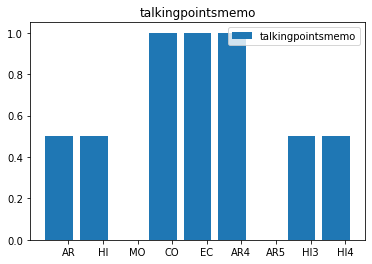

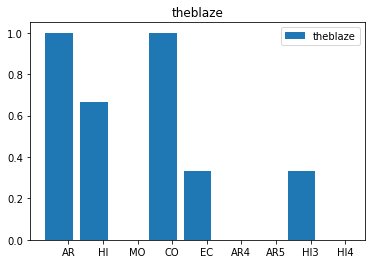

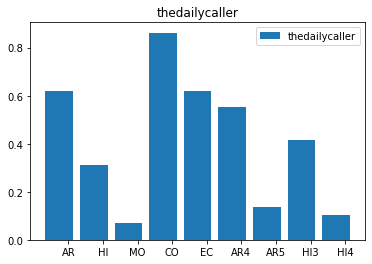

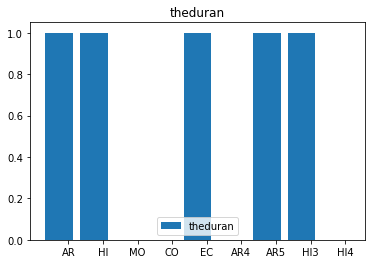

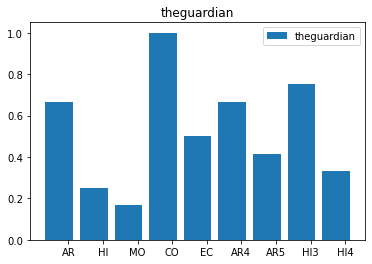

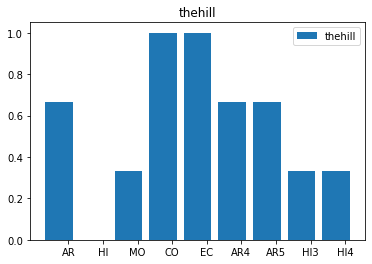

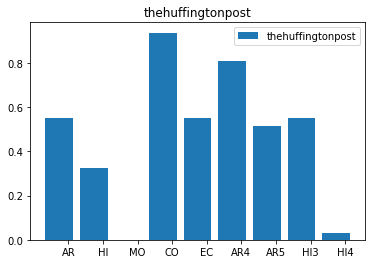

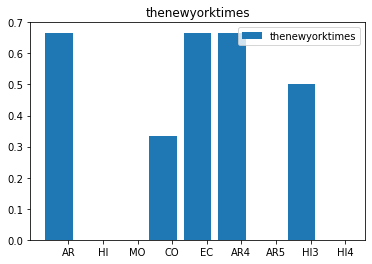

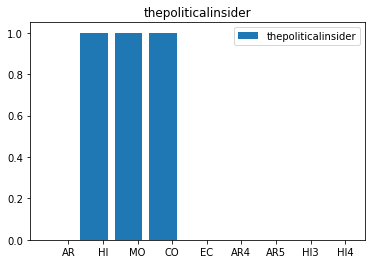

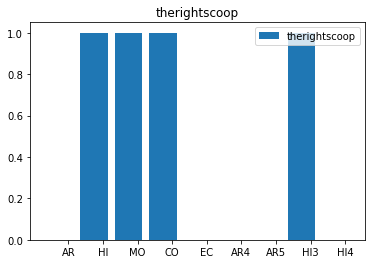

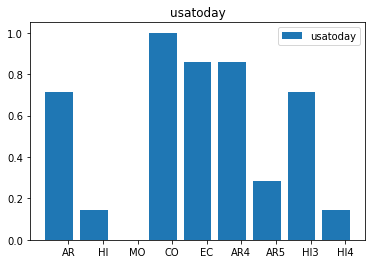

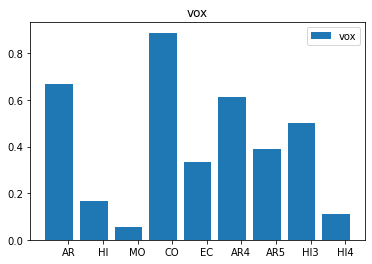

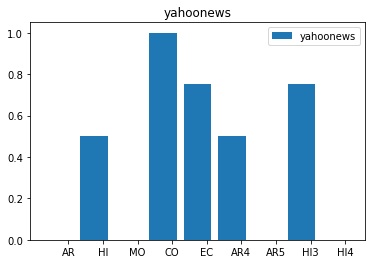

In [27]:
# proportion
def plot_by_source_proportion(i):
    size = 9
    x = np.arange(size)

    item = np.array([item/len(sources[sorted_source[i]]) for item in [ar_source[i],hi_source[i],mo_source[i],co_source[i],ec_source[i],ar4_source[i],ar5_source[i],hi3_source[i],hi4_source[i]]])
    plt.bar(x, item, label=sorted_source[i])

    plt.legend()
    plt.xticks([i+width for i in x], ['AR','HI','MO','CO','EC','AR4','AR5','HI3','HI4'])
    plt.title(sorted_source[i])
    plt.savefig('./output/source_proportion_' + sorted_source[i] + '.png', dpi=300)
    plt.show()
    
for i in range(0, len(source_analysis.keys())):
    plot_by_source_proportion(i)